# gather all images

In [2]:
import os
def get_images(path):
    #gets images for each animal
    os.chdir(path)
    images = []
    with os.scandir(path) as files:
  # loops through each file in the directory
        for file in files:
            if file.name.endswith('.jpeg'):
          #append jpg files to images
                images.append(path + "/" + file.name)
    return images

all_images = []
for animal in ["scoiattolo", "ragno", "pecora", "mucca", "gatto", "gallina", "farfalla", "elefante", "cavallo",
              "cane"]:
    each_images = get_images("/Users/emma/Downloads/archive-3/raw-img/" + animal)
    for image in each_images:
        all_images.append(image)


# randomly shuffle image dataset and show initial images

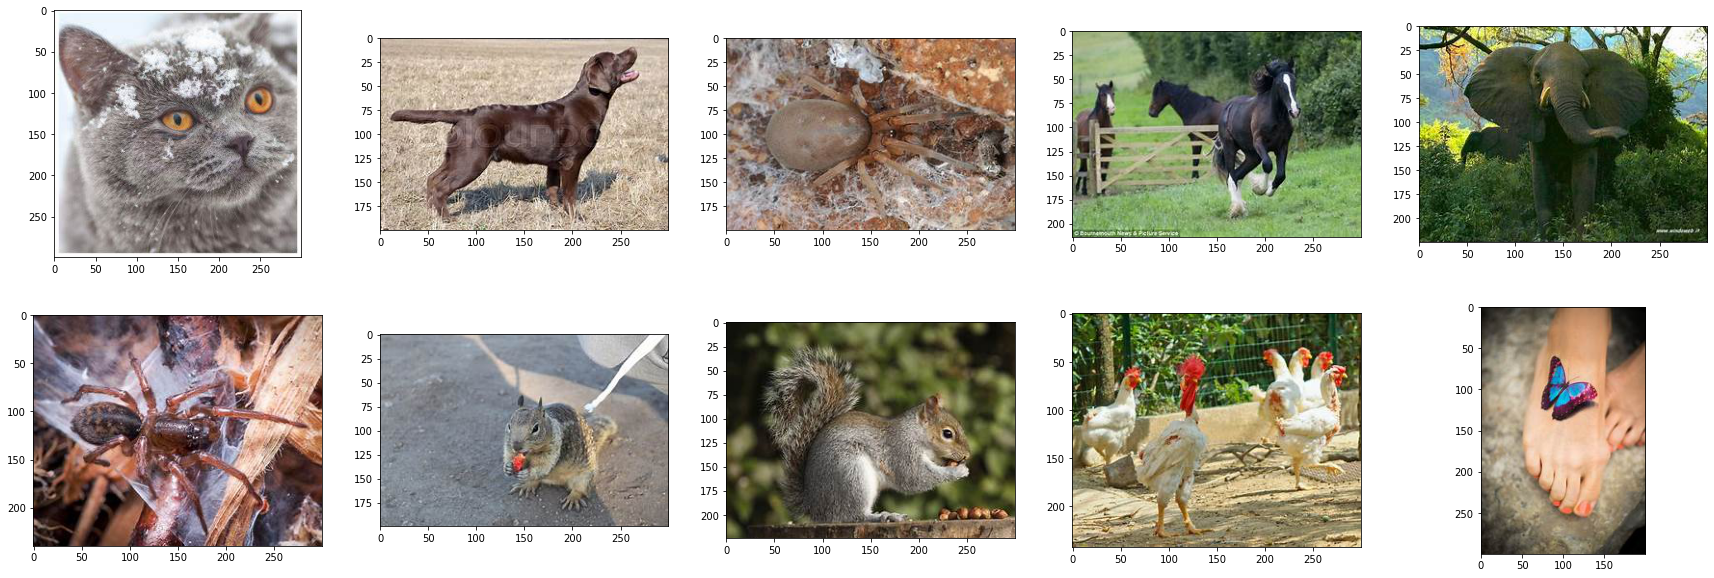

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
random.shuffle(all_images)
#show first ten images
first_ten_images = all_images[0:10]
rows=2
columns=5
fig, axes = plt.subplots(rows,columns,figsize=(30,10))
for i in range(len(first_ten_images)):
    plt.subplot(rows,columns, i + 1)
    img = mpimg.imread(first_ten_images[i])
    plt.imshow(img)
  



# load model

In [5]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
import cv2
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)


# preprocess and obtain features

In [6]:
#cluster first hundred images
first_hundred_images = all_images[0:100]
features_list= []
for i in range(len(first_hundred_images)):
    image = load_img(first_hundred_images[i], target_size=(224,224))
    #convert image to an array
    image = np.array(image)
    #resize image to (224, 224 again)
    img = cv2.resize(image,(224,224))
    img = img.reshape(1,224,224,3)
    #obtain features from image 
    features = model.predict(img, use_multiprocessing=True)
    features_list.append(features)
feat = np.array(features_list)
feat = feat.reshape(-1,4096)
print(feat.shape)

(100, 4096)


# use PCA to reduce dimensionality of photos

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=22)
pca.fit(feat)
X = pca.transform(feat)
print(X.shape)

(100, 50)


# fit K-Means clustering algorithm

In [8]:
from sklearn.cluster import KMeans
#eleven clusters - ten original animal groups + noise
kmeans = KMeans(n_clusters=11, random_state=22)
kmeans.fit(X)

KMeans(n_clusters=11, random_state=22)

# predict labels using K-Means

In [9]:
#predict
predicted_labels = kmeans.predict(X)
predicted_labels = list(predicted_labels)
print(predicted_labels)


[1, 2, 5, 2, 10, 5, 10, 3, 10, 1, 2, 5, 9, 8, 1, 2, 10, 8, 4, 10, 1, 2, 10, 2, 1, 8, 1, 5, 1, 10, 5, 10, 2, 2, 5, 2, 1, 10, 10, 2, 8, 1, 1, 5, 2, 10, 3, 3, 1, 5, 3, 10, 10, 5, 2, 10, 3, 5, 2, 6, 2, 5, 2, 1, 5, 1, 2, 3, 5, 7, 0, 10, 5, 9, 1, 1, 1, 10, 2, 8, 10, 8, 10, 1, 10, 10, 1, 1, 1, 10, 10, 10, 5, 1, 10, 1, 2, 3, 10, 3]


# obtain label dictionary

In [14]:
cluster_dict = {}
for i in range(len(predicted_labels)):
    label = predicted_labels[i]
    if label not in cluster_dict.keys():
        cluster_dict[label] = []
        cluster_dict[label].append(first_hundred_images[i])
    else:
        cluster_dict[label].append(first_hundred_images[i])
new_dict = {}
for key in sorted(cluster_dict):
    new_dict[key] = cluster_dict[key]

        

# show the first five images of each cluster (if >= 5)

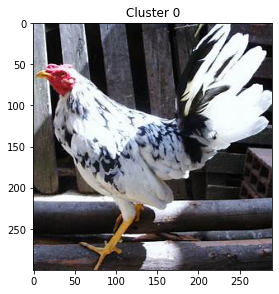

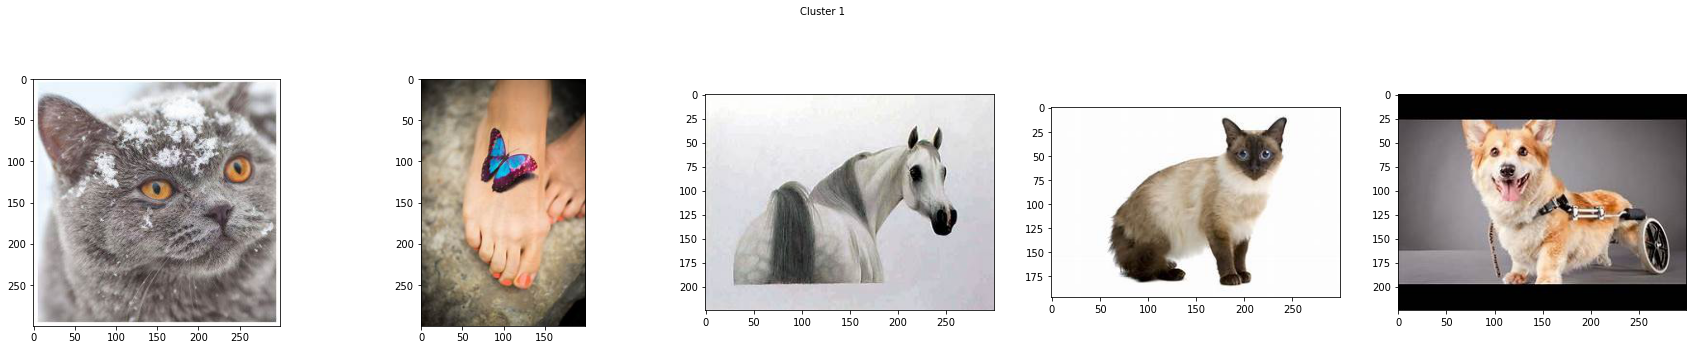

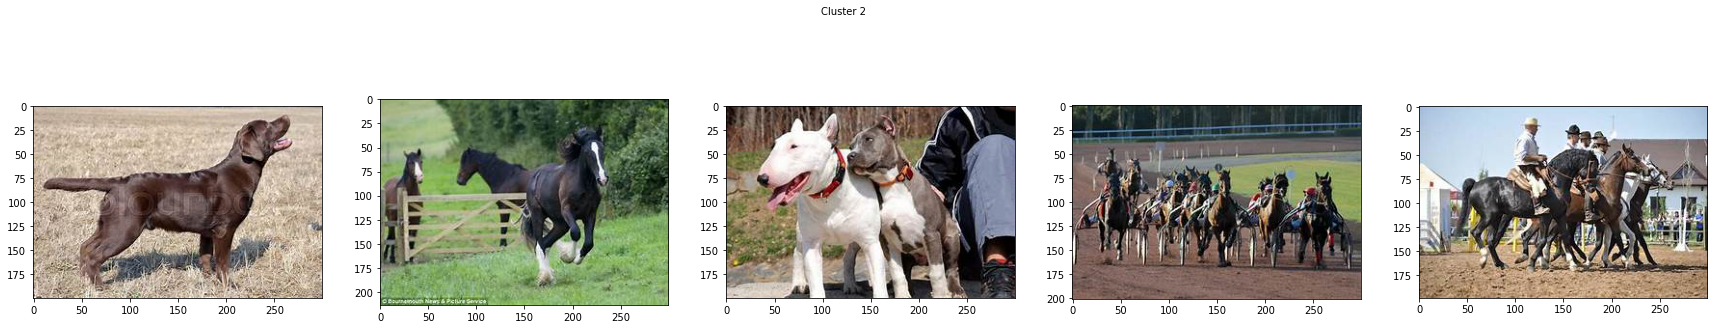

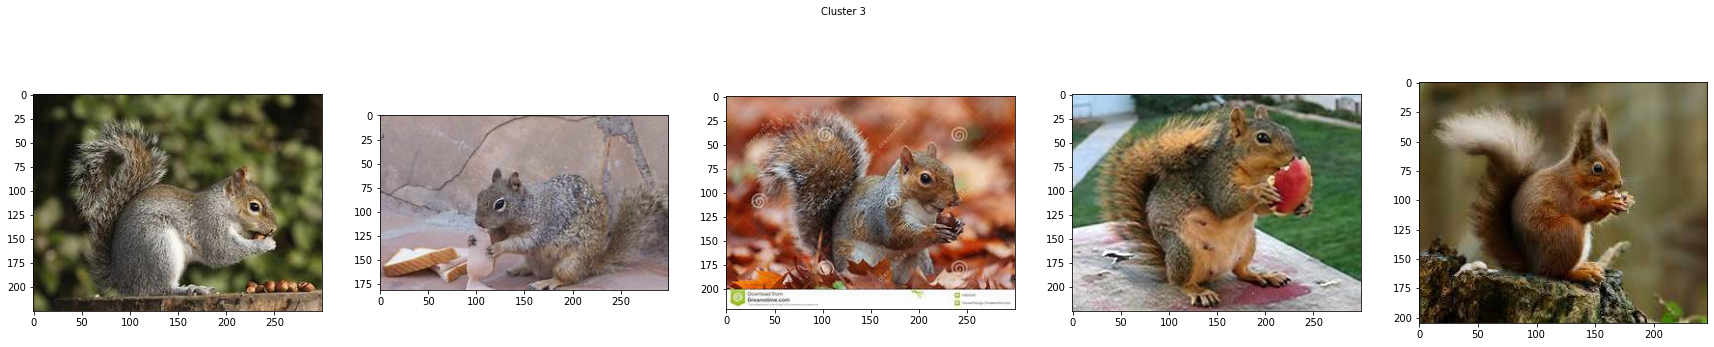

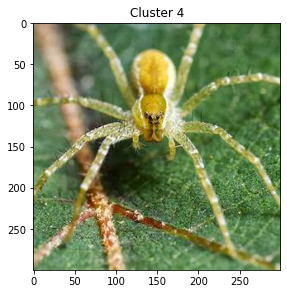

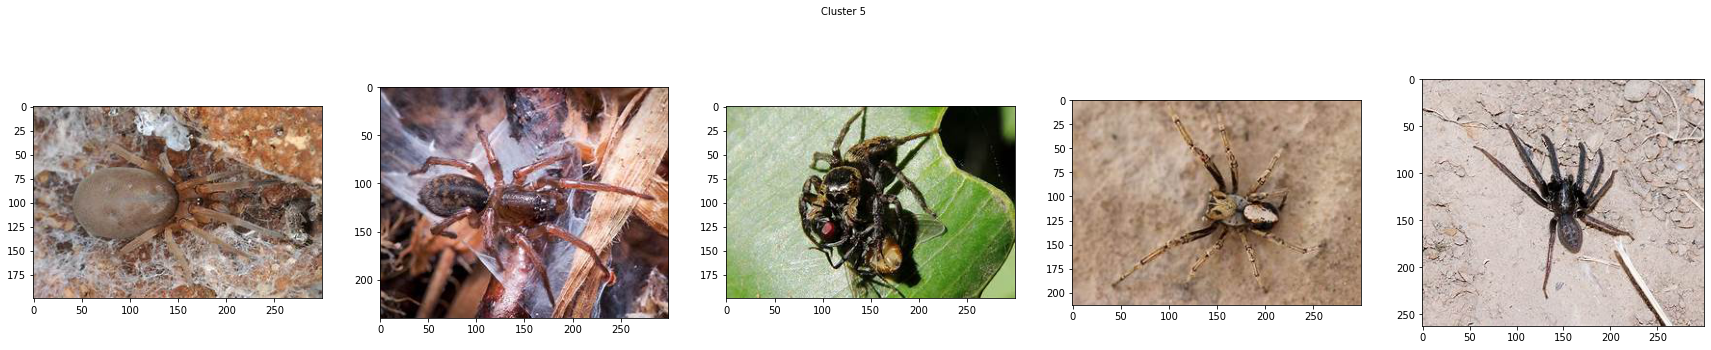

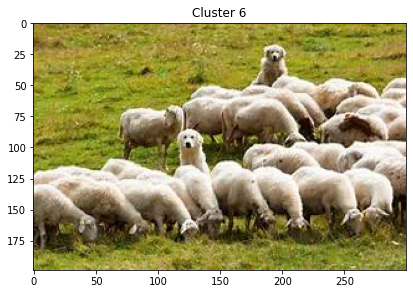

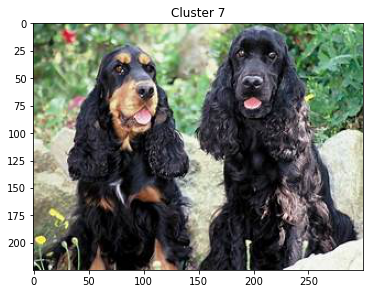

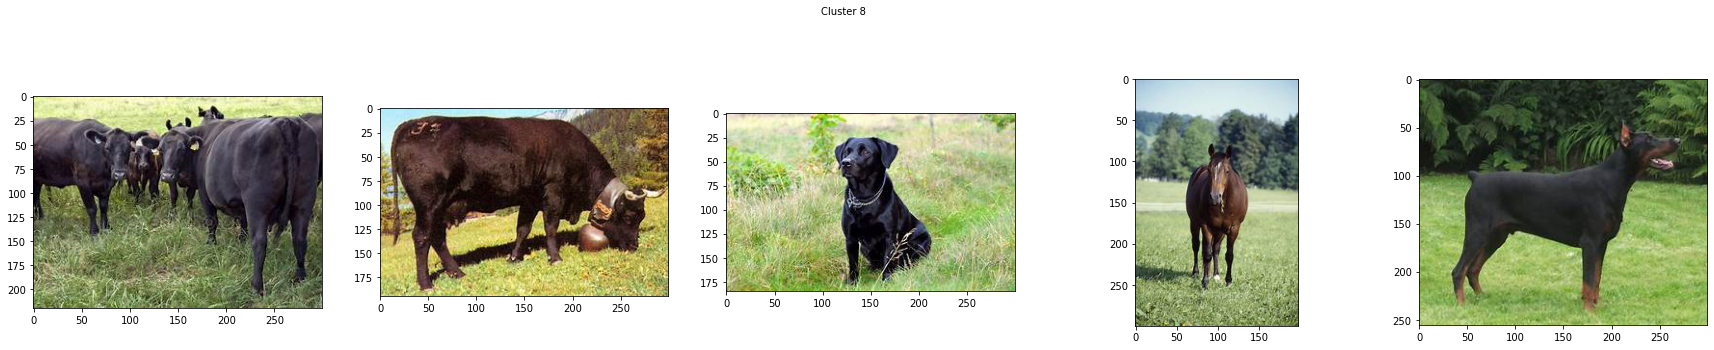

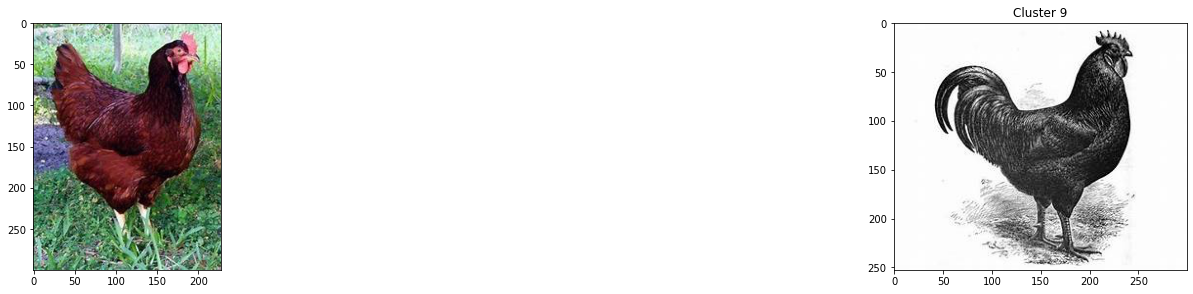

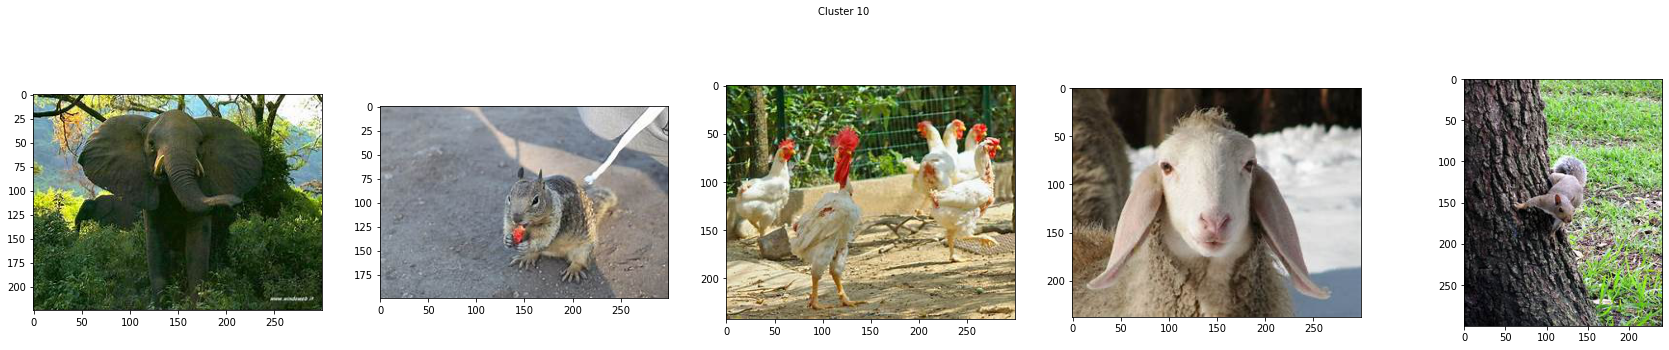

In [32]:
clusters = list(new_dict.values())
for i in range(len(clusters)):
    cluster = clusters[i]
    if len(cluster) >=5:
        first_five_images = cluster[0:5]
        columns = 5
        fig, axes = plt.subplots(1, columns,figsize=(30,10))
        for j in range(len(first_five_images)):
            plt.subplot(rows,columns, j + 1)
            img = mpimg.imread(first_five_images[j])
            plt.imshow(img)
        plt.suptitle("Cluster"+ " " + str(i), size=10)
    else:
        first_n_images = cluster[0:len(cluster)]
        columns = len(cluster)
        fig, axes = plt.subplots(1, columns,figsize=(30,10))
        for j in range(len(first_n_images)):
            plt.subplot(rows,columns, j + 1)
            img = mpimg.imread(first_n_images[j])
            plt.imshow(img)
        plt.title("Cluster" + " " + str(i))
   


        

        
